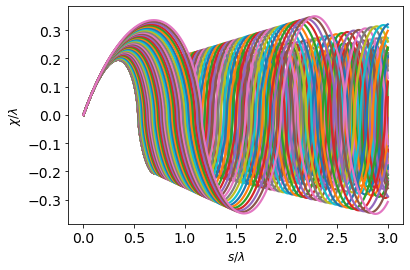

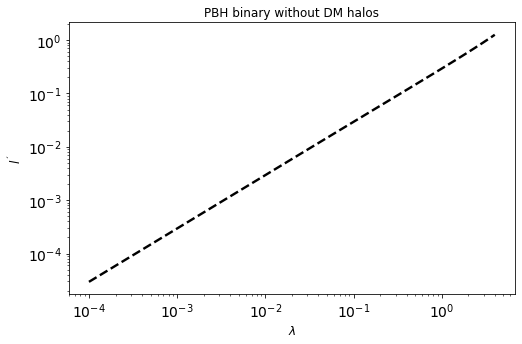

In [1]:
# Tidal torque exerted by the neighbouring PBH in the PBH binaries without dark matter 
# halos and decoupling around matter-radiation equality.


# Solution of eq.(14) using eq.(6) for PBH binaries without DM halos given in paper 
# "The merger rate of primordial-black-hole binaries".


#Variation of  l^{'} with λ for the PBH binary without DM halos.

#Reference notes "Merger rate of PBH binary without DM halos".

#l^{'} is dimensionless.

import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from module import *


def H(s):
    return ((s**4)*h(s))



# Eq.(23) in "Merger rate of PBH binary without DM halos".       
def integral(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,(3*λ_0),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.rc('lines', linewidth=2.2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.plot(As,Bs,'')
    plt.xlabel('$s/λ$',fontsize=12)
    plt.ylabel('$χ/λ$',fontsize=12)
    χ=separations**2
    s_list=ss.tolist()
    H_list=np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        H_list[i] = H(s)
    integrand=( χ/H_list)
    x=np.trapz(integrand,s_list)
    return x
     

l_list=np.zeros(len(λ_list))
for i, (λ_0) in enumerate(λ_list):
    l_list[i] = integral(λ_0)
    

    
plt.rc('lines', linewidth=2.4)    
plt.figure(figsize=(8,5))
plt.loglog(λ_list,l_list,'k--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$l^{´}$',fontsize=12)
plt.title('PBH binary without DM halos')
plt.show()   

p=  
0.004039 x + 0.2931


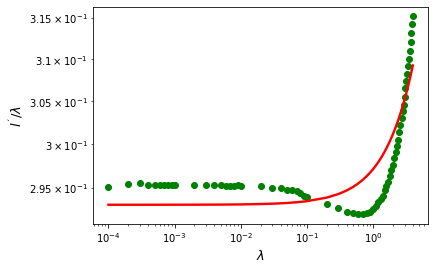

Maximum Percentage error= 1.8709 %


In [2]:
# Fitting of the the curve for the value of l^{'}/λ vs λ for the PBH binary without dark matter 
# halos.

x = np.array(λ_list)
y = np.array(l_list) 
Y = np.array(y/x)

z = np.polyfit(x, Y, 1)
p = np.poly1d(z)
print("p=",p)

plt.loglog(x,Y,'go')
plt.plot(x,p(x),'r')
plt.yscale('log')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l^{´}/λ$',fontsize=13)
plt.show()



#Calculation of the Maximum Percentage error in the numerical and fitted value of l^{´}/λ for
#PBH binary without dark matter halos.
Y_list = Y.tolist()
q= np.array(p(x))
q_list=q.tolist()

def percentage_error(numerical, fitted): 
    return (np.abs((numerical - fitted) / numerical)) * 100

error_list=np.zeros(len(λ_list))

for i, (Y,q) in enumerate(zip(Y_list,q_list)):
    error_list[i] = percentage_error(Y, q)    #Percentage error 

error_max=np.max(error_list)
print("Maximum Percentage error= "'%0.4f'%error_max,"%")

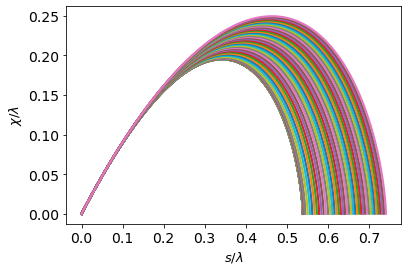

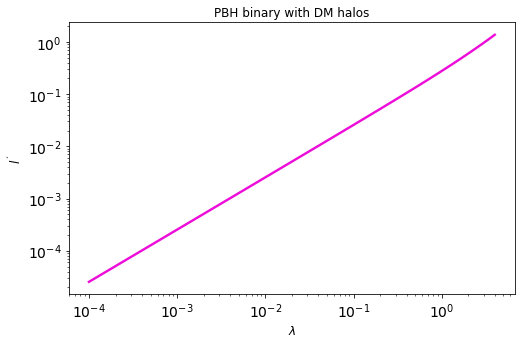

In [4]:
# Tidal torque exerted by the neighbouring PBH in the PBH binaries with dark matter 
# halos and decoupling around matter-radiation equality.


# Solution of eq.(56) using extended mass function in reference pdf "Angular momentum 
#  in the PBH binary".

#Variation of  l^{'} with λ for the PBH binary with DM halos decoupling 
# around matter-radiation equality.


B=(((8*π*G*ρ_eq*(t_eq**2))/3)**(3/4))


def I(s):
    return (math.sqrt(((2/3)*(s-2)*math.sqrt(s+1))+(4/3))/H(s))
   



#Function to calculate scale factor at which the PBHs cross each other for the first time in  
# the binary.
def s_osc(λ_0):
    def f(u,s,λ_0):
            return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(λ_0,s)
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(1) in reference pdf "M_DM at s_dec".
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,(2*λ_0),1000000) 
    us= odeint(f,separation0,ss,args=(λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        B=(Bs[i])
        d=As[i]
        if B<0:
            break
    D=d*λ_0        
    return D

s_halo_list=np.zeros(len(λ_list))  
for k, λ_0 in enumerate(λ_list):
    s_halo_list[k] = s_osc(λ_0) #s at which the PBHs cross each other for the first time in  
                                     # the binary.


        

# Eq.(40) in "Merger rate of PBH binary without DM halos".
def integral(λ_0,s):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(λ_0,s)
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,s,1000000)
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.rc('lines', linewidth=2.2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.plot(As,Bs,'')
    plt.xlabel('$s/λ$',fontsize=13)
    plt.ylabel('$χ/λ$',fontsize=13)
    χ=separations**2
    s_list=ss.tolist()
    H_list=np.zeros(len(s_list))
    I_list=np.zeros(len(s_list))
    m_list=np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        H_list[i] = H(s)
        I_list[i] = I(s)
    integrand_1=(χ/H_list)
    integrand_2=(χ*I_list)
    x=np.trapz(integrand_1,s_list)    
    z=np.trapz(integrand_2,s_list)     
    Y=(x)+(2*B*z)
    return Y
    

l_halo_list=np.zeros(len(λ_list))
for i, (λ_0,s) in enumerate(zip(λ_list,s_halo_list)):
    l_halo_list[i] = integral(λ_0,s)

    
    
plt.rc('lines', linewidth=2.4)
plt.figure(figsize=(8,5))
plt.loglog(λ_list,l_halo_list,'#ED0DD9')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$l^{´}$',fontsize=12)
plt.title('PBH binary with DM halos') 
plt.show()

p=  
0.02196 x + 0.2555


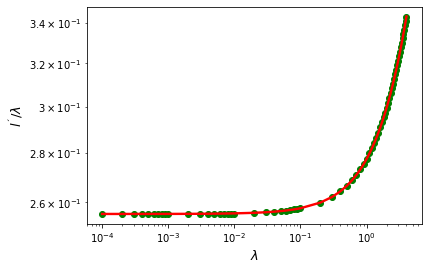

Maximum Percentage error= 0.0796 %


In [5]:
# Fitting of the the curve for the value of l^{'}/λ vs λ for the PBH binary with dark matter 
# halos.

x_halo = np.array(λ_list)
y_halo = np.array(l_halo_list) 
Y_halo = np.array(y_halo/x_halo)



z = np.polyfit(x_halo, Y_halo, 1)
p_halo = np.poly1d(z)
print("p=",p_halo)

plt.loglog(x_halo,Y_halo,'go')
plt.plot(x_halo,p_halo(x_halo),'r')
plt.yscale('log')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l^{´}/λ$',fontsize=13)
plt.show()


#Calculation of the Maximum Percentage error in the numerical and fitted value of l^{´}/λ for
#PBH binary with dark matter halos.

Y_halo_list = Y_halo.tolist()
q_halo= np.array(p_halo(x_halo))
q_halo_list=q_halo.tolist()

def percentage_error(numerical, fitted): 
    return (np.abs((numerical - fitted) / numerical)) * 100

error_halo_list=np.zeros(len(λ_list))

for i, (Y,q) in enumerate(zip(Y_halo_list,q_halo_list)):
    error_halo_list[i] = percentage_error(Y, q)    #Percentage error 


error_halo_max=np.max(error_halo_list)
print("Maximum Percentage error= "'%0.4f'%error_halo_max,"%")

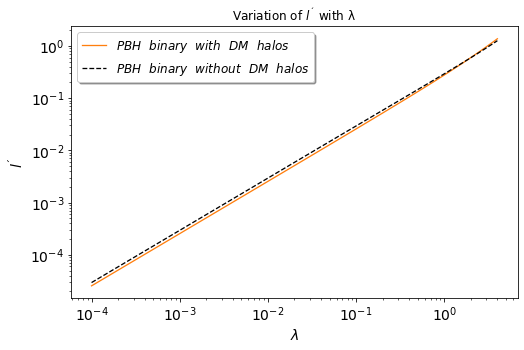

In [6]:
#Variation of l^{'} with λ for the PBH binaries with and without DM halos decoupling 
# upto matter-radiation equality.

plt.rc('lines', linewidth=1.3)
plt.figure(figsize=(8,5))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.loglog(λ_list, l_halo_list,'C1')
plt.loglog(λ_list,l_list,'k--')
plt.xlabel('$λ$',fontsize=14)
plt.ylabel('$l^{´}$',fontsize=14)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$','$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :12},
              loc='upper left',shadow = True,
               facecolor = 'white',fontsize=16)        

plt.title('Variation of $l^{´}$ with λ')
plt.savefig("l^' vs λ.pdf")
plt.show()